# Models of Discrete-Time Systems

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 17**](worksheet17).

* The [Jupytext](https://jupytext.readthedocs.io/en/latest/index.html) source code for this page is [dt_systems/4/dt_models.md](https://github.com/cpjobling/eg-247-textbook/blob/master/dt_systems/4/dt_models.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/dt_models.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/dt_models.pdf) file.

## Scope and Background Reading

In this section we will explore digital systems and learn more about the z-transfer function model.

The material in this presentation and notes is based on Chapter 9 (Starting at [Section 9.7](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=363)) of {cite}`karris`. I have skipped the section on digital state-space models.

## Agenda

* [Discrete Time Systems](dtsystems)

* [Transfer Functions in the Z-Domain](tf)

* [Modelling digital systems in Matlab/Simulink](simulink)

* [Converting Continuous Time Systems to Discrete Time Systems](cse)

* [Example: Digital Butterworth Filter](demo)

(dtsystems)=
## Discrete Time Systems

In the lecture that introduced the z-transform we talked about the representation of a discrete-time (DT) system by the model shown below:

![DT System](./pictures/ct-to-dt.png)

In this session, we want to explore the contents of the central block.

### DT System as a Sequence Processor

* As noted in the previous slide, the discrete time system (DTS) `takes as an input the sequence $x_d[n]$<sup>1</sup> which in a physical signal would be obtained by sampling the continuous time signal $x(t)$ using an analogue to digital converter (ADC).

* It produces another sequence $y_d[n]$ by *processing* the input sequence in some way.

* The output sequence is converted into an analogue signal $y(t)$ by a digital to analogue converter (DAC).

![DT System as a Sequence Processor](./pictures/sigs.png)

### What is the nature of the DTS?

* The discrete time system (DTS) is a block that converts a sequence $x_d[n]$ into another sequence $y_d[n]$

* The transformation will be a *difference equation* $h[n]$

* By analogy with CT systems, $h[n]$ is the impulse response of the DTS, and $y[n]$ can be obtained by *convolving* $h[n]$ with $x_d[n]$ so:

$$y_d[n] = h[n] * x_d[n]$$

* Taking the z-transform of $h[n]$ we get $H(z)$, and from the transform properties, convolution of the signal $x_d[n]$ by system $h[n]$ will be *multiplication* of the z-transforms:

$$Y_d(z) = H(z) X_d(z)$$

* So, what does $h[n]$ and therefore $H(z)$ look like?

(tf)=
## Transfer Functions in the Z-Domain

Let us assume that the sequence transformation is a *difference equation* of the form<sup>2</sup>:

$$\begin{array}{l}
y[n] + {a_1}y[n - 1] + {a_2}y[n - 2] +  \cdots  + {a_k}y[n - k]\\
\quad  = {b_0}x[n] + {b_1}u[n - 1] + {b_2}u[n - 2] +  \cdots  + {b_k}u[n - k]
\end{array}$$

### Take Z-Transform of both sides

From the z-transform properties

$$f[n-m] \Leftrightarrow z^{-m}F(z)$$

so....

$$Y(z) + a_1z^{-1}Y(z) + a_2z^{-2}Y(z) + \cdots + a_kz^{-k}Y(z) = ...$$

$$b_0 U(z) + b_1z^{-1}U(z) + b_2z^{-2}U(z) + \cdots + b_kz^{-k}U(z)$$

### Gather terms

$$\begin{array}{l}
\left( 1 + {a_1} z^{-1} + {a_2} z^{-2} +  \cdots {a_k} z^{-k} \right)Y(z) = \\
\quad \left( b_0 + b_1 z^{-1} + b_2 z^{- 2} +  \cdots b_k z^{- k} \right)U(z)
\end{array}$$

from which ...

$$Y(z) = \left(\frac{b_0 + b_{1}z^{-1} + b_{2}z^{-2} + \cdots b_{k}z^{-k}}{1 + a_{1}z^{-1} + a_{2}z^{-2} + \cdots a_{k}z^{-k}
}\right) U(z)$$

### Define the transfer function

We define the *discrete time transfer function* $H(z) := Y(z)/U(z)$ so...

$$H(z) = \frac{Y(z)}{U(z)} = \frac{b_0 + b_{1}z^{-1} + b_{2}z^{-2} + \cdots b_{k}z^{-k}}{1 + a_{1}z^{-1} + a_{2}z^{-2} + \cdots a_{k}z^{-k}
}$$

... or more conventionally<sup>3</sup>:

$$H(z) = \frac{b_0z^k + b_{1}z^{k-1} + b_{2}z^{k-2} + \cdots b_{k-1}z + b_{k}}{z^k + a_{1}z^{k-1} + a_{2}z^{k-2} + \cdots a_{k-1} z + a_{k}}$$

### DT impulse response

The *discrete-time impulse reponse* $h[n]$ is the response of the DT system to the input $x[n] = \delta[n]$

Last week we showed that 

$$\mathcal{Z}\left\{\delta[n]\right\}$$

was defined by the transform pair 

$$\delta[n] \Leftrightarrow 1$$

so 

$$h[n] = \mathcal{Z}^{-1}\left\{H(z).1\right\} = \mathcal{Z}^{-1}\left\{H(z)\right\}$$

We will work through an example in class.

[Skip next slide in Pre-Lecture]

### Example 5

Karris Example 9.10:

The difference equation describing the input-output relationship of a DT system with zero initial conditions, is:

$$y[n] - 0.5 y[n-1] + 0.125 y[n-2] = x[n] + x[n -1]$$

Compute:

1. The transfer function $H(z)$
2. The DT impulse response $h[n]$
3. The response $y[n]$ when the input $x[n]$ is the DT unit step $u_0[n]$

#### 5.1. The transfer function

$$H(z) = \frac{Y(z)}{U(z)} = ...?$$

<pre style="border: 2px solid blue">



















</pre>

#### 5.2. The DT impulse response

Start with:

$$\frac{H(z)}{z} = \frac{z + 1}{z^2 - 0.5 z + 0.125}$$

<pre style="border: 2px solid blue">



















</pre>

##### Matlab Solution

In [1]:
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
cd matlab
pwd
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dt_systems/4/matlab'


See [dtm_ex1_2.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_2.mlx). (Also available as [dtm_ex1_2.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_2.m).)

The difference equation describing the input-output relationship of the DT system with zero initial conditions, is:

$$y[n] - 0.5 y[n-1] + 0.125 y[n-2] = x[n] + x[n -1]$$

###### Transfer function

Numerator $z^2 + z$

In [2]:
Nz = [1 1 0];

Denominator $z^2 - 0.5 z + 0.125$

In [3]:
Dz = [1 -0.5 0.125];

###### Poles and residues

In [4]:
[r,p,k] = residue(Nz,Dz)

r =
   0.7500 - 0.5000i
   0.7500 + 0.5000i


p =
   0.2500 + 0.2500i
   0.2500 - 0.2500i


k =
     1


###### Impulse Response

In [5]:
Hz = tf(Nz,Dz,1)
hn = impulse(Hz, 15);


Hz =


        z^2 + z


  -------------------


  z^2 - 0.5 z + 0.125


Sample time: 1 seconds


Discrete-time transfer function.



###### Plot the response

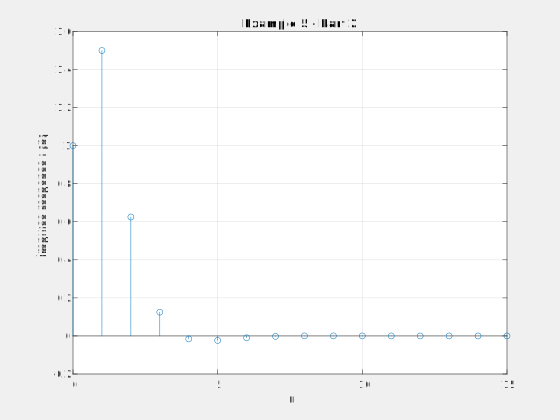

In [6]:
stem([0:15], hn)
grid
title('Example 5 - Part 2')
xlabel('n')
ylabel('Impulse response h[n]')

###### Response as stepwise continuous y(t)

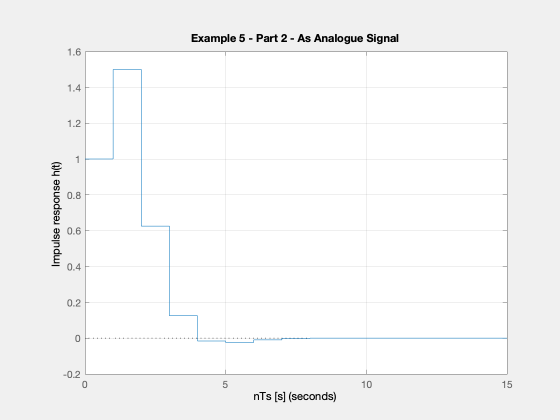

In [7]:
impulse(Hz,15)
grid
title('Example 5 - Part 2 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Impulse response h(t)')

#### 5.3. The DT step response

$$Y(z) = H(z)X(z)$$

$$u_0[n] \Leftrightarrow \frac{z}{z - 1}$$

We will work through this example in class.

[Skip next slide in Pre-Lecture]

$$\begin{eqnarray*}
Y(z) = H(z){U_0}(z) &=& \frac{z^2 + z}{z^2 - 0.5z + 0.125}.\frac{z}{z - 1}\\
 & = & \frac{z(z^2 + z)}{(z^2 - 0.5z + 0.125)(z - 1)}
\end{eqnarray*}$$

$$\frac{Y(z)}{z} = \frac{z^2 + z}{(z^2 + 0.5 z + 0.125)(z - 1)}$$

Solved by inverse Z-transform.

<pre style="border: 2px solid blue">



















</pre>

##### Matlab Solution

See [dtm_ex1_3.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_3.mlx). (Also available as [dtm_ex1_3.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_3.m).)

In [8]:
open dtm_ex1_3

###### Results

![Results](./pictures/dtm_ex1_3_1.png)

(simulink)=
## Modelling DT systems in MATLAB and Simulink

We will consider some examples in class

### MATLAB

Code extracted from [dtm_ex1_3.m](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm_ex1_3.m):

In [9]:
Ts = 1;
z = tf('z', Ts);

In [10]:
Hz = (z^2 + z)/(z^2 - 0.5 * z + 0.125)


Hz =


        z^2 + z


  -------------------


  z^2 - 0.5 z + 0.125


Sample time: 1 seconds


Discrete-time transfer function.



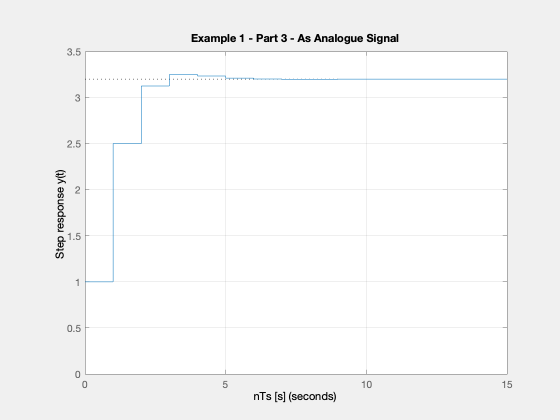

In [11]:
step(Hz)
grid
title('Example 1 - Part 3 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Step response y(t)')
axis([0,15,0,3.5])

### Simulink Model

See [dtm.slx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/dtm.slx):

![Simulink model](./pictures/simulink_model.png)

In [12]:
dtm

#### Results

![Simulink results](./pictures/scope.png)

(cse)=
## Converting Continuous Time Systems to Discrete Time Systems

In analogue electronics, to implement a filter we would need to resort to op-amp circuits with resistors, capacitors and inductors acting as energy dissipation, storage and release devices.

* In modern digital electronics, it is often more convenient to take the original transfer function $H(s)$ and produce an equivalent $H(z)$.

* We can then determine a *difference equation* that will respresent $h[n]$ and implement this as *computer algorithm*.

* Simple storage of past values in memory becomes the repository of past state rather than the integrators and derivative circuits that are needed in the analogue world.

To achieve this, all we need is to be able to do is to *sample* and *process* the signals quickly enough to avoid violating Nyquist-Shannon's sampling theorem.

### Continuous System Equivalents

* There is no digital system that uniquely represents a continuous system
* This is because as we are sampling, we only have knowledge of signals being processed at the sampling instants, and need to *reconstruct* the inter-sample behaviour.
* In practice, only a small number of transformations are used.
* The derivation of these is beyond the scope of this module, but **in class** we'll demonstrate the ones that MATLAB provides in a function called `c2d`

### MATLAB c2d function

Let's see what the help function says:

In [13]:
help c2d

 C2D  Converts continuous-time dynamic system to discrete time.
 
    SYSD = C2D(SYSC,TS,METHOD) computes a discrete-time model SYSD with
    sample time TS that approximates the continuous-time model SYSC.
    The string METHOD selects the discretization method among the following:
       'zoh'           Zero-order hold on the inputs
       'foh'           Linear interpolation of inputs
       'impulse'       Impulse-invariant discretization
       'tustin'        Bilinear (Tustin) approximation.
       'matched'       Matched pole-zero method (for SISO systems only).
       'least-squares' Least-squares minimization of the error between
                       frequency responses of the continuous and discrete
                       systems (for SISO systems only).
       'damped'        Damped Tustin approximation based on TRBDF2 formula
                       (sparse models only).
    The default is 'zoh' when METHOD is omitted. The sample time TS should
    be specified in the time

In [14]:
doc c2d

(demo)=
## Example: Digital Butterworth Filter

* Design a 2nd-order butterworth low-pass anti-aliasing filter with transfer function $H(s)$ for use in sampling music. 
* The cut-off frequency $\omega_c = 20$&nbsp;kHz and the filter should have an attenuation of at least $-80$&nbsp;dB in the stop band. 
* Choose a suitable sampling frequency for the audio signal and give the transfer function $H(z)$ and an algorithm to implement $h[n]$

### Solution

See [digi_butter.mlx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/digi_butter.mlx).

First determine the cut-off frequency $\omega_c$

$$\omega_c = 2\pi f_c = 2\times \pi \times 20\times 10^3\;\mathrm{rad/s}$$

In [15]:
wc = 2*pi*20e3

wc =
   1.2566e+05


$$\omega_c = 125.6637\times 10^3\;\mathrm{rad/s}$$

From the lecture on filters, we know the 2nd-order butterworth filter has transfer function:

$$H(s) = \frac{Y(s)}{U(s)} = \frac{\omega _c^2}{s^2 + \omega _c\sqrt 2 \,s + \omega _c^2}$$

Substituting for $\omega_c = 125.6637\times 10^3 $ this is ...?

In [16]:
Hs = tf(wc^2,[1 wc*sqrt(2), wc^2])


Hs =


           1.579e10


  ---------------------------


  s^2 + 1.777e05 s + 1.579e10


Continuous-time transfer function.



$$H(s) = \frac{15.79 \times 10^9}{s^2 + 177.7 \times 10^3 s + 15.79 \times 10^9}$$

#### Bode plot

MATLAB:

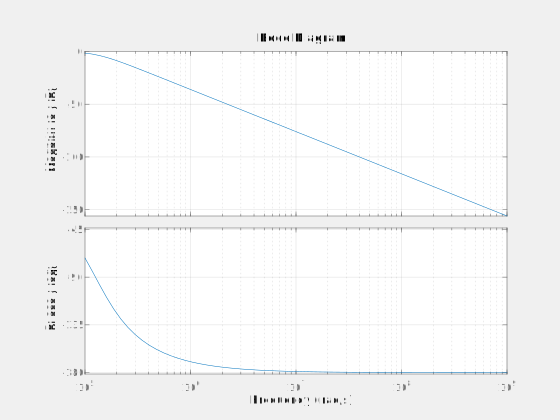

In [17]:
doc bode
bode(Hs,{10e4,10e8})
grid

#### Sampling Frequency

From the bode diagram, the frequency roll-off is -40 dB/decade for frequencies $\omega \gg \omega_c$. So, $|H(j\omega)| = -80$&nbsp;dB  is approximately 2 decades above $\omega_c$.

In [18]:
w_stop = 100*wc

w_stop =
   1.2566e+07


To avoid aliasing, we should choose a sampling frequency twice this = ?

$\omega_s = 2\times \omega_\mathrm{stop}$&nbsp;rad/s.

In [19]:
ws = 2* w_stop

ws =
   2.5133e+07


Sampling frequency ($f_s$) in Hz  = ?

$$f_s = \omega_s/(2\pi)\;\mathrm{Mhz}$$

In [20]:
fs = ws/(2*pi)

fs =
     4000000


$$f_s = 4\;\mathrm{Mhz}$$

Sampling time $T_s = ?$

$T_s = 1/fs\;\mathrm{s}$

In [21]:
Ts = 1/fs

Ts =
   2.5000e-07


$$T_s = 1/f_s = 0.25\;\mu\mathrm{s}$$

#### Digital Butterworth

zero-order-hold equivalent

In [22]:
Hz = c2d(Hs, Ts)


Hz =


  0.0004862 z + 0.0004791


  -----------------------


  z^2 - 1.956 z + 0.9565


Sample time: 2.5e-07 seconds


Discrete-time transfer function.



#### Step response

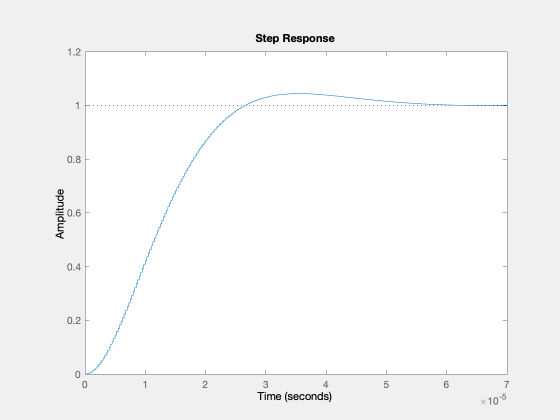

In [23]:
step(Hz)

#### Algorithm

From previous result:

$$H(z) = \frac{Y(z)}{U(z)} = \frac{486.2\times 10^{-6}z +  479.1\times 10^{-6}}{z^2 - 1.956z + 0.9665}$$

Dividing top and bottom by $z^2$ ...

$$H(z) = \frac{Y(z)}{U(z)} = \frac{486.2\times 10^{-6}z^{-1} +  479.1\times 10^{-6}z^{-2}}{1 - 1.956z^{-1} + 0.9665z^{-2}}$$

expanding out ...

$$\begin{array}{l}
Y(z) - 1.956{z^{ - 1}}Y(z) + 0.9665{z^{ - 2}}Y(z) = \\
\quad 486.2 \times {10^{ - 6}}{z^{ - 1}}U(z) + 479.1 \times {10^{ - 6}}{z^{ - 2}}U(z)
\end{array}$$

Inverse z-transform gives ...

$$\begin{array}{l}
y[n] - 1.956y[n - 1] + 0.9665y[n - 2] = \\
\quad 486.2 \times {10^{ - 6}}u[n - 1] + 479.1 \times {10^{ - 6}}u[n - 2]
\end{array}$$

in algorithmic form (compute $y[n]$ from past values of $u$ and $y$) ...

$$\begin{array}{l}
y[n] = 1.956[n - 1] - 0.9665y[n - 2] + 486.2 \times {10^{ - 6}}u[n - 1] + ...\\
\quad 479.1 \times {10^{ - 6}}u[n - 2]
\end{array}$$

#### Block Diagram of the digital BW filter


![digital filter](pictures/digifilter-bd.png)

#### As Simulink Model

[digifilter.slx](https://cpjobling.github.io/eg-247-textbook/dt_systems/4/matlab/digifilter.slx)

In [24]:
open digifilter

#### Convert to code

To implement:


$$y[n] = y[n] = 1.956[n - 1] - 0.9665y[n - 2] + 486.2 \times {10^{ - 6}}u[n - 1] + 479.1 \times {10^{ - 6}}u[n - 2]$$

    /* Initialize */
    Ts = 0.25e-06; /* more probably some fraction of clock speed */
    ynm1 = 0; ynm2 = 0; unm1 = 0; unm2 = 0;
    while (true) {
        un = read_adc;
        yn = 1.956*ynm1 - 0.9665*ynm2 + 486.2e-6*unm1 + 479.1e-6*unm2;
        write_dac(yn);
        /* store past values */
        ynm2 = ynm1; ynm1 = yn;
        unm2 = unm1; unm1 = un;
        wait(Ts);
    }

#### Comments

PC soundcards can sample audio at 44.1 kHz so this implies that the anti-aliasing filter is much sharper than this one as $f_s/2 = 22.05$ kHz.

You might wish to find out what order butterworth filter would be needed to have $f_c = 20$ kHz and $f_{\mathrm{stop}}$ of 22.05 kHz.

## Summary

* Discrete Time Systems
* Transfer Functions in the Z-Domain
* Modelling digital systems in MATLAB/Simulink
* Continuous System Equivalents
* In-class demonstration: Digital Butterworth Filter

## Reference

```{bibliography}
:filter: docname in docnames
```

## Solutions to Example 5

### Solution to 5.1.

The transfer function is

$$H(z) = \frac{Y(z)}{X(z)} = \frac{z^2 + z}{z^2 - 0.5z + 0.125}$$

### Solution to 5.2.

The DT impulse response:

$$h[n] = \left( \frac{\sqrt 2}{4} \right)^n{\left( \cos \left( \frac{n\pi}{4} \right) + 5\sin \left( \frac{n\pi}{4} \right) \right)}$$

### Solution to 5.3.

Step response:

$$y[n] = \left(3.2 - \left( \frac{\sqrt 2}{4} \right)^n\left( 2.2 \cos \left( \frac{n\pi}{4} \right) + 0.6\sin \left(\frac{n\pi}{4} \right) \right)\right) u_0[n]$$